Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [1]:
NAME = "Iswaryaah Balakrishnan"

## Assignment 1 - Data Cleaning & Exploration
**(30 points total)**

For this assignment, we will use an open dataset with data on various types of cereal and the corresponding customer ratings. Use the .csv file provided.

Create a dataframe by importing the file into Jupyter, and complete the tasks below. Be sure to show your Python code. You will not be graded on code efficiency, but your code should return a correct answer.

**Question 1.**  _(4 points)_
* Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.

**Question 2.**  _(2 points)_
* Identify the negative values in the data set and replace them with the median value for that column. 

**Question 3.** _(5 points)_
* Standardize the 'weight' column to 1. For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1. For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1. 

**Question 4.**  _(5 points)_
* Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.

**Question 5.** _(2 points)_
* Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

**Question 6.** _(2 points)_
* Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

**Question 7.** _(2 points)_
* Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

**Question 8.** _(3 points)_
* Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

**Question 9.** _(3 points)_
* Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy. 

**Question 10.** _(1 point)_
* Which shelf has the most healthy cereals?

**Question 11.** _(1 point)_
* Based on the analysis conducted, what can you conclude about the cereal data set?

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv('cereal.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
df.describe(include='all')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,100% Bran,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392


In [6]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


# Question 1 (4 points) 
### Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.

In [7]:
df['name'].unique()

array(['100% Bran', '100% Natural Bran', 'All-Bran',
       'All-Bran with Extra Fiber', 'Almond Delight',
       'Apple Cinnamon Cheerios', 'Apple Jacks', 'Basic 4', 'Bran Chex',
       'Bran Flakes', "Cap'n'Crunch", 'Cheerios', 'Cinnamon Toast Crunch',
       'Clusters', 'Cocoa Puffs', 'Corn Chex', 'Corn Flakes', 'Corn Pops',
       'Count Chocula', "Cracklin' Oat Bran", 'Cream of Wheat (Quick)',
       'Crispix', 'Crispy Wheat & Raisins', 'Double Chex', 'Froot Loops',
       'Frosted Flakes', 'Frosted Mini-Wheats',
       'Fruit & Fibre Dates; Walnuts; and Oats', 'Fruitful Bran',
       'Fruity Pebbles', 'Golden Crisp', 'Golden Grahams',
       'Grape Nuts Flakes', 'Grape-Nuts', 'Great Grains Pecan',
       'Honey Graham Ohs', 'Honey Nut Cheerios', 'Honey-comb',
       'Just Right Crunchy  Nuggets', 'Just Right Fruit & Nut', 'Kix',
       'Life', 'Lucky Charms', 'Maypo',
       'Muesli Raisins; Dates; & Almonds',
       'Muesli Raisins; Peaches; & Pecans', 'Mueslix Crispy Blend',
  

In [8]:
df['Type of Cereal'] = df['name']

In [9]:
df.loc[df['Type of Cereal'].str.contains('Bran'), 'Type of Cereal'] = 'Bran'
df.loc[df['Type of Cereal'].str.contains('Wheat'), 'Type of Cereal'] = 'Wheat'
df.loc[df['Type of Cereal'].str.contains('Fiber'), 'Type of Cereal'] = 'Fiber'
df.loc[df['Type of Cereal'].str.contains('Protein'), 'Type of Cereal'] = 'Protein'
df.loc[df['Type of Cereal'].str.contains('Crunch'), 'Type of Cereal'] = 'Crunch'
df.loc[df['Type of Cereal'].str.contains('Corn'), 'Type of Cereal'] = 'Corn'
df.loc[df['Type of Cereal'].str.contains('Nut'), 'Type of Cereal'] = 'Nut'
df.loc[df['Type of Cereal'].str.contains('Rice'), 'Type of Cereal'] = 'Rice'


df.loc[~df['Type of Cereal'].str.contains('Bran|Wheat|Fiber|Protein|Crunch|Corn|Nut|Rice'),'Type of Cereal'] = 'Other'


In [10]:
df.groupby(['Type of Cereal'])['Type of Cereal'].count().to_frame()

,Type of Cereal
Type of Cereal,
Bran,13
Corn,4
Crunch,4
Nut,5
Other,37
Rice,3
Wheat,11


In [11]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Other


In [12]:
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,Other
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,Other
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Wheat
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,Wheat
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559,Wheat


# Question 2 (2 points)
### Identify the negative values in the data set and replace them with the median value for that column.

In [13]:
df.describe(include='all')

# Here we can see we have negative values in the following columns: carbo, sugars and potass where the min values are -1

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,100% Bran,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705,NaN
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289,NaN
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851,NaN
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094,NaN
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208,NaN
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392,NaN


In [14]:
df.loc[df['carbo']<0,'carbo']=df['carbo'].median()

In [15]:
df.loc[df['sugars']<0,'sugars']=df['sugars'].median()

In [16]:
df.loc[df['potass']<0,'potass']=df['potass'].median()

In [17]:
df[(df['potass']<0)|(df['carbo']<0)|(df['sugars']<0)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal


In [18]:
df.describe(include='all')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,100% Bran,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.792208,7.025974,98.441558,28.246753,2.207792,1.029610,0.821039,42.665705,NaN
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,3.882612,4.349755,69.491857,22.342523,0.832524,0.150477,0.232716,14.047289,NaN
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851,NaN
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000,1.000000,1.000000,0.670000,33.174094,NaN
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208,NaN
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392,NaN


# Question 3 (5 points)
### Standardize the 'weight' column to 1. For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1. For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1.


In [19]:
df['calories'] = df['calories']/(df['weight']/df["weight"])
df['protein'] = df['protein']/(df['weight']/df["weight"])
df['fat'] = df['fat']/(df['weight']/df["weight"])
df['sodium'] = df['sodium']/(df['weight']/df["weight"])
df['fiber'] = df['fiber']/(df['weight']/df["weight"])
df['carbo'] = df['carbo']/(df['weight']/df["weight"])
df['sugars'] = df['sugars']/(df['weight']/df["weight"])
df['potass'] = df['potass']/(df['weight']/df["weight"])
df['vitamins'] = df['vitamins']/(df['weight']/df["weight"])


In [20]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,90.0,25.0,3,1.0,0.75,34.384843,Other


# Question 4 (5 points)
### Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.

In [21]:
conditions = [
    (df['calories'] <100 ) & (df['sodium'] <150 ) & (df['sugars'] <9 ) & (df['fiber'] >3 ),
    (df['protein'] > 2)] 
choices = ['Healthy', 'Unhealthy']
df['Healthy vs Unhealthy'] = np.select(conditions, choices, default='Healthy')

In [22]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal,Healthy vs Unhealthy
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3,1.0,0.33,68.402973,Bran,Healthy
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3,1.0,1.00,33.983679,Bran,Unhealthy
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3,1.0,0.33,59.425505,Bran,Unhealthy
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3,1.0,0.50,93.704912,Bran,Healthy
4,Almond Delight,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,90.0,25.0,3,1.0,0.75,34.384843,Other,Healthy


# Question 5 (2 points)
### Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

In [23]:
df.groupby('mfr')['Healthy vs Unhealthy'].value_counts(normalize=True) * 100

# A - 0
# G - 59.090909
# K - 52.173913
# N - 66.666667
# P - 33.333333
# Q - 50
# R - 62.5

mfr  Healthy vs Unhealthy
A    Unhealthy               100.000000
G    Healthy                  59.090909
     Unhealthy                40.909091
K    Healthy                  52.173913
     Unhealthy                47.826087
N    Healthy                  66.666667
     Unhealthy                33.333333
P    Unhealthy                66.666667
     Healthy                  33.333333
Q    Healthy                  50.000000
     Unhealthy                50.000000
R    Healthy                  62.500000
     Unhealthy                37.500000
Name: Healthy vs Unhealthy, dtype: float64

# Question 6 (2 points)
### Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

In [24]:
df.groupby(['Healthy vs Unhealthy'])['rating'].min().to_frame()

# Minimum ratings

,rating
Healthy vs Unhealthy,
Healthy,18.042851
Unhealthy,28.592785


In [25]:
df.groupby(['Healthy vs Unhealthy'])['rating'].max().to_frame()

# Maximum ratings

,rating
Healthy vs Unhealthy,
Healthy,93.704912
Unhealthy,72.801787


In [26]:
df.groupby(['Healthy vs Unhealthy'])['rating'].mean().to_frame()

# Average ratings

,rating
Healthy vs Unhealthy,
Healthy,40.304940
Unhealthy,45.354354


# Question 7 (2 points)
### Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

In [27]:
df.groupby(['Type of Cereal'])['rating'].min().to_frame()

# Minimum ratings

,rating
Type of Cereal,
Bran,28.592785
Corn,35.782791
Crunch,18.042851
Nut,31.072217
Other,21.871292
Rice,40.560159
Wheat,36.176196


In [28]:
df.groupby(['Type of Cereal'])['rating'].max().to_frame()

# Maximum ratings

,rating
Type of Cereal,
Bran,93.704912
Corn,45.863324
Crunch,36.523683
Nut,53.371007
Other,55.333142
Rice,60.756112
Wheat,72.801787


In [29]:
df.groupby(['Type of Cereal'])['rating'].mean().to_frame()

# Average ratings

,rating
Type of Cereal,
Bran,50.714179
Corn,40.482720
Crunch,26.078598
Nut,42.736791
Other,37.379947
Rice,47.771735
Wheat,56.333863


# Question 8 (3 points)
### Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

<AxesSubplot:xlabel='mfr'>

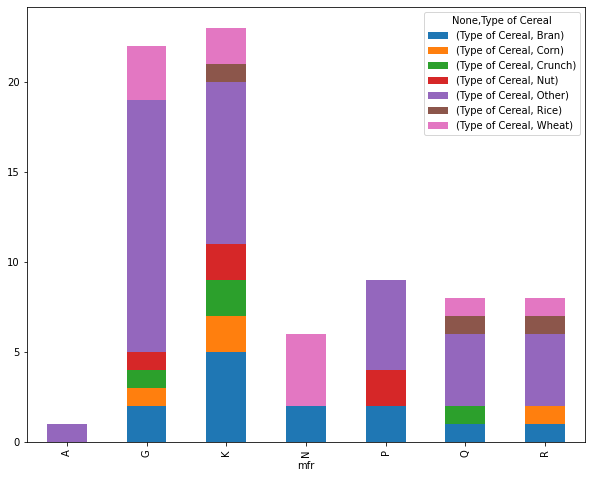

In [30]:
df.groupby(['mfr','Type of Cereal'])['Type of Cereal'].count().to_frame().unstack().plot(kind='bar', stacked=True, figsize=(10,8))

# Question 9 (3 points)
### Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy.

<AxesSubplot:xlabel='calories', ylabel='rating'>

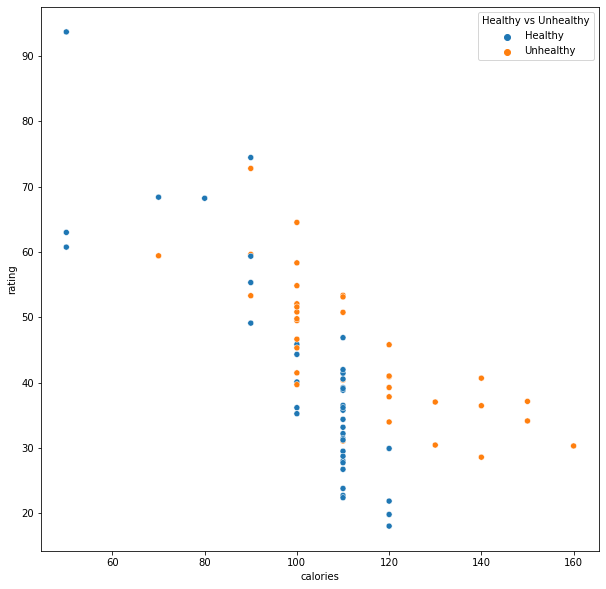

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['calories'],y=df['rating'],hue=df['Healthy vs Unhealthy'])

# Question 10 (1 point)
### Which shelf has the most healthy cereals?

<AxesSubplot:xlabel='shelf'>

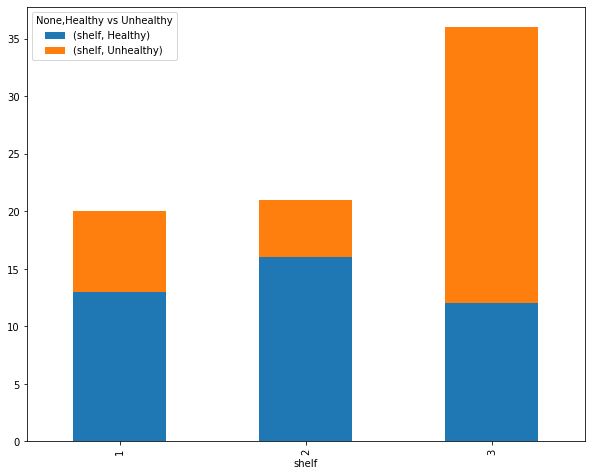

In [32]:
df.groupby(['shelf','Healthy vs Unhealthy'])['shelf'].count().to_frame().unstack().plot(kind='bar', stacked=True, figsize=(10,8))

# Shelf 2 has the most healthy cereals

# Question 11 (1 point)
### Based on the analysis conducted, what can you conclude about the cereal data set?